In [1]:
%ls

'#logistic-regression-numpy.ipynb'*   data/
'Classifying non linear data.ipynb'   file.db*
 Components.ipynb                     lib/
 Dockerfile*                          models/
 MLP.ipynb                            neural_net/
 ModelGraph.html                      pure_numpy_clean.ipynb*
'OLS with tf.ipynb'*                  pure_numpy_clean.py*
 active_funcs.ipynb                   readme.md*
 autodiff_reverse_mode.jpeg*          tf_logs/


In [2]:
import neural_net

# Initialization

## Linear Layer

In [3]:
 fc = neural_net.layers.fullyconnected(n_in=2,n_out=6)

In [4]:
str(fc)

'fullyconnected'

In [5]:
fc.id

{'id': 140322287064400,
 'type': 'fullyconnected',
 'self': <neural_net.layers.fullyconnected at 0x7f9f54131550>,
 'n_in': 2,
 'n_out': 6,
 'init_method': <function neural_net.init_funcs.zeros(n_in, n_out=None, k=1)>}

In [6]:
fc.outfuncs

## Linear neuron

In [7]:
linear_neuron = fc.outfuncs[0]
linear_neuron

In [8]:
str(linear_neuron)

'Linear'

In [9]:
linear_neuron.id

{'id': 140322336120656,
 'type': 'Linear',
 'self': <neural_net.activation_funcs.Σ at 0x7f9f56ff9f50>,
 'layer': {'id': 140322287064400,
  'type': 'fullyconnected',
  'self': <neural_net.layers.fullyconnected at 0x7f9f54131550>,
  'n_in': 2,
  'n_out': 6,
  'init_method': <function neural_net.init_funcs.zeros(n_in, n_out=None, k=1)>}}

In [10]:
linear_neuron.w.shape

(3, 1)

## activation layer

In [11]:
al = neural_net.layers.activation(n_in=6,func=neural_net.activation_funcs.σ)

In [12]:
al.outfuncs

In [13]:
str(al)

'activation'

## sigmoid neuron

In [14]:
sigmoid = al.outfuncs[0]
sigmoid

In [15]:
str(sigmoid)

'sigmoid'

In [16]:
sigmoid.id

{'id': 140321944674576,
 'type': 'sigmoid',
 'self': <neural_net.activation_funcs.σ at 0x7f9f3faaa110>,
 'layer': {'id': 140321944732432,
  'type': 'activation',
  'self': <neural_net.layers.activation at 0x7f9f3fab8310>,
  'n_in': 6,
  'func': neural_net.activation_funcs.σ,
  'n_out': 6}}

## Architecture

In [17]:
network = neural_net.architecture.Sequential(
        [
        neural_net.layers.fullyconnected(n_in=2,n_out=10),
        neural_net.layers.activation(n_in=10,func=neural_net.activation_funcs.σ),
        neural_net.layers.fullyconnected(n_in=10,n_out=1),
        neural_net.layers.activation(n_in=1,func=neural_net.activation_funcs.σ)
        ]
    ,cost_func=neural_net.loss.binaryCrossEntropy)

In [18]:
network.steps

In [19]:
network.cost_func

neural_net.loss.binaryCrossEntropy

## db

In [20]:
network.db_path

'/home/analyst/notebooks/neural_net/run/model20240221200756.db'

In [21]:
neural_net.db.DBmanager.con

In [22]:
cursor = neural_net.db.DBmanager.con.cursor()

In [23]:
%ls  neural_net/run/*db

neural_net/run/model20240220131718.db  neural_net/run/model20240221130959.db
neural_net/run/model20240220133607.db  neural_net/run/model20240221131035.db
neural_net/run/model20240220134055.db  neural_net/run/model20240221131047.db
neural_net/run/model20240221074731.db  neural_net/run/model20240221131105.db
neural_net/run/model20240221123943.db  neural_net/run/model20240221153110.db
neural_net/run/model20240221125044.db  neural_net/run/model20240221153150.db
neural_net/run/model20240221125510.db  neural_net/run/model20240221153340.db
neural_net/run/model20240221130056.db  neural_net/run/model20240221154537.db
neural_net/run/model20240221130605.db  neural_net/run/model20240221154635.db
neural_net/run/model20240221130911.db  neural_net/run/model20240221155511.db


In [24]:
import pandas
res = cursor.execute('''

        SELECT * 
        FROM
        sqlite_schema

''')
pandas.DataFrame(res.fetchall(),columns=map(lambda x : x[0],res.description))

,type,name,tbl_name,rootpage,sql
0,table,Neurons,Neurons,2,CREATE TABLE Neurons(\n id INTEGER PRIMARY KE...
1,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
2,table,Layers,Layers,4,CREATE TABLE Layers(\n id INTEGER PRIMARY KEY...
3,table,Weights,Weights,5,CREATE TABLE Weights(\n id INTEGER PRIMARY KE...


# Predicting

In [20]:
import numpy
X = numpy.random.uniform(-1,1,size=(100,2))

## Linear Layer

In [26]:
network.steps[0]

### Feeding data to input layer

In [27]:
network.steps[0].In = [(id(X),X)]

In [28]:
network.steps[0].In

{139672688124208: array([[0.93878428, 0.90283105],
        [0.55500851, 0.24524446],
        [0.89541828, 0.99838993],
        [0.99394382, 0.40765429],
        [0.62893252, 0.50221995],
        [0.43626342, 0.09392459],
        [0.26801014, 0.89245778],
        [0.71751574, 0.50496285],
        [0.76146452, 0.37105594],
        [0.16446329, 0.005541  ],
        [0.57662724, 0.24228815],
        [0.02524366, 0.98053186],
        [0.67270543, 0.41504405],
        [0.01929896, 0.80631256],
        [0.76534982, 0.88235251],
        [0.77268958, 0.71381348],
        [0.11369221, 0.80784593],
        [0.94135778, 0.41339848],
        [0.76261341, 0.23533667],
        [0.9964816 , 0.65183979],
        [0.07044856, 0.14387329],
        [0.52433909, 0.22039505],
        [0.17171118, 0.70568008],
        [0.20589782, 0.59672222],
        [0.11370958, 0.27911411],
        [0.7165389 , 0.77031275],
        [0.42936699, 0.35095721],
        [0.93064497, 0.93334976],
        [0.59926422, 0.67765524

In [29]:
network.steps[0].outfuncs

In [30]:
network.steps[0].outfuncs[0]

In [31]:
network.steps[0].outfuncs[0].In

((139672688124208,),
 array([[0.93878428, 0.90283105],
        [0.55500851, 0.24524446],
        [0.89541828, 0.99838993],
        [0.99394382, 0.40765429],
        [0.62893252, 0.50221995],
        [0.43626342, 0.09392459],
        [0.26801014, 0.89245778],
        [0.71751574, 0.50496285],
        [0.76146452, 0.37105594],
        [0.16446329, 0.005541  ],
        [0.57662724, 0.24228815],
        [0.02524366, 0.98053186],
        [0.67270543, 0.41504405],
        [0.01929896, 0.80631256],
        [0.76534982, 0.88235251],
        [0.77268958, 0.71381348],
        [0.11369221, 0.80784593],
        [0.94135778, 0.41339848],
        [0.76261341, 0.23533667],
        [0.9964816 , 0.65183979],
        [0.07044856, 0.14387329],
        [0.52433909, 0.22039505],
        [0.17171118, 0.70568008],
        [0.20589782, 0.59672222],
        [0.11370958, 0.27911411],
        [0.7165389 , 0.77031275],
        [0.42936699, 0.35095721],
        [0.93064497, 0.93334976],
        [0.59926422, 0.6776

### Db layers

In [32]:
%pwd

'/home/analyst/notebooks'

In [33]:
%load_ext sql
#%sql sqlite:///neural_net/run/model20240221130605.db

In [34]:
%%sql   

SELECT * 
FROM layers

 * sqlite:///neural_net/run/model20240221130605.db
Done.


id,layer_id,n_out,created_at,updated_at,type
1,139673612221968,10,2024-02-21 13:06:30,2024-02-21 13:06:30,fullyconnected


### Neurons

In [35]:
%%sql

SELECT * 
        FROM
        neurons


 * sqlite:///neural_net/run/model20240221130605.db
Done.


id,neuron_id,n_in,layer_id,created_at,updated_at,type
1,139673552776976,2,139673612221968,2024-02-21 13:06:30,2024-02-21 13:06:30,Linear
2,139673142045584,2,139673612221968,2024-02-21 13:06:30,2024-02-21 13:06:30,Linear
3,139672800498192,2,139673612221968,2024-02-21 13:06:30,2024-02-21 13:06:30,Linear
4,139672800498640,2,139673612221968,2024-02-21 13:06:30,2024-02-21 13:06:30,Linear
5,139672800498448,2,139673612221968,2024-02-21 13:06:30,2024-02-21 13:06:30,Linear
6,139672800498704,2,139673612221968,2024-02-21 13:06:30,2024-02-21 13:06:30,Linear
7,139672800498832,2,139673612221968,2024-02-21 13:06:30,2024-02-21 13:06:30,Linear
8,139672800498896,2,139673612221968,2024-02-21 13:06:30,2024-02-21 13:06:30,Linear
9,139672800498960,2,139673612221968,2024-02-21 13:06:30,2024-02-21 13:06:30,Linear
10,139672800498768,2,139673612221968,2024-02-21 13:06:30,2024-02-21 13:06:30,Linear


### Weights

In [36]:
%%sql

SELECT * 
FROM
weights


 * sqlite:///neural_net/run/model20240221130605.db
Done.


id,weight_id,neuron_id,created_at,updated_at,value
1,0,139673552776976,2024-02-21 13:06:30,2024-02-21 13:06:30,0.0
2,1,139673552776976,2024-02-21 13:06:30,2024-02-21 13:06:30,0.0
3,2,139673552776976,2024-02-21 13:06:30,2024-02-21 13:06:30,0.0
4,0,139673142045584,2024-02-21 13:06:30,2024-02-21 13:06:30,0.0
5,1,139673142045584,2024-02-21 13:06:30,2024-02-21 13:06:30,0.0
6,2,139673142045584,2024-02-21 13:06:30,2024-02-21 13:06:30,0.0
7,0,139672800498192,2024-02-21 13:06:30,2024-02-21 13:06:30,0.0
8,1,139672800498192,2024-02-21 13:06:30,2024-02-21 13:06:30,0.0
9,2,139672800498192,2024-02-21 13:06:30,2024-02-21 13:06:30,0.0
10,0,139672800498640,2024-02-21 13:06:30,2024-02-21 13:06:30,0.0


### Predictions

In [37]:
len(network.steps[0].eval())

10

In [38]:
network.steps[0].out[0][1].shape

(100, 1)

## Activation Layer

In [39]:
network.steps[1].In = network.steps[0].out

In [40]:
%%sql
SELECT * from layers

 * sqlite:///neural_net/run/model20240221130605.db
Done.


id,layer_id,n_out,created_at,updated_at,type
1,139673612221968,10,2024-02-21 13:06:30,2024-02-21 13:06:30,fullyconnected
2,139672800499024,10,2024-02-21 13:07:14,2024-02-21 13:07:14,activation


In [41]:
len(network.steps[1].In)

10

In [42]:
network.steps[1].outfuncs

In [43]:
network.steps[1].outfuncs[0]

In [44]:
network.steps[1].outfuncs[0].In

(139672680531696,
 array([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
  

In [45]:
network.steps[1].outfuncs[0].In[1].shape

(100, 1)

In [46]:
len(network.steps[1])

10

In [47]:
len(network.steps[1].eval())

10

In [48]:
%%sql 
Select * from neurons where type='sigmoid'

 * sqlite:///neural_net/run/model20240221130605.db
Done.


id,neuron_id,n_in,layer_id,created_at,updated_at,type
11,139672800499088,1,139672800499024,2024-02-21 13:07:14,2024-02-21 13:07:14,sigmoid
12,139672800499152,1,139672800499024,2024-02-21 13:07:14,2024-02-21 13:07:14,sigmoid
13,139672800499216,1,139672800499024,2024-02-21 13:07:14,2024-02-21 13:07:14,sigmoid
14,139672800499280,1,139672800499024,2024-02-21 13:07:14,2024-02-21 13:07:14,sigmoid
15,139672800499408,1,139672800499024,2024-02-21 13:07:14,2024-02-21 13:07:14,sigmoid
16,139672800499600,1,139672800499024,2024-02-21 13:07:14,2024-02-21 13:07:14,sigmoid
17,139672800499728,1,139672800499024,2024-02-21 13:07:14,2024-02-21 13:07:14,sigmoid
18,139672800499856,1,139672800499024,2024-02-21 13:07:14,2024-02-21 13:07:14,sigmoid
19,139672800499984,1,139672800499024,2024-02-21 13:07:14,2024-02-21 13:07:14,sigmoid
20,139672800499536,1,139672800499024,2024-02-21 13:07:14,2024-02-21 13:07:14,sigmoid


In [49]:
%%sql
Select count(*) as nb_weights from weights 

 * sqlite:///neural_net/run/model20240221130605.db
Done.


nb_weights
30


In [50]:
network.steps[1].outfuncs[0].eval()

(139672680545328,
 array([[0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
       

In [51]:
len(network.steps[1].out)

10

## Second Linear Layer

In [52]:
network.steps[2].In = network.steps[1].out

In [53]:
len(network.steps[2].In)

10

In [54]:
network.steps[2].outfuncs

In [55]:
%%sql

SELECT * 
FROM
layers


 * sqlite:///neural_net/run/model20240221130605.db
Done.


id,layer_id,n_out,created_at,updated_at,type
1,139673612221968,10,2024-02-21 13:06:30,2024-02-21 13:06:30,fullyconnected
2,139672800499024,10,2024-02-21 13:07:14,2024-02-21 13:07:14,activation
3,139672800500304,1,2024-02-21 13:07:35,2024-02-21 13:07:35,fullyconnected


In [56]:
network.steps[2].outfuncs[0].In[1].shape

(100, 10)

In [57]:
len(network.steps[2].eval())

1

In [59]:
%%sql
SELECT * from neurons where layer_id = 139672800500304

 * sqlite:///neural_net/run/model20240221130605.db
Done.


id,neuron_id,n_in,layer_id,created_at,updated_at,type
21,139672800500368,10,139672800500304,2024-02-21 13:07:35,2024-02-21 13:07:35,Linear


In [60]:
%%sql
SELECT * from weights where neuron_id = 139672800500368

 * sqlite:///neural_net/run/model20240221130605.db
Done.


id,weight_id,neuron_id,created_at,updated_at,value
31,0,139672800500368,2024-02-21 13:07:35,2024-02-21 13:07:35,0.0
32,1,139672800500368,2024-02-21 13:07:35,2024-02-21 13:07:35,0.0
33,2,139672800500368,2024-02-21 13:07:35,2024-02-21 13:07:35,0.0
34,3,139672800500368,2024-02-21 13:07:35,2024-02-21 13:07:35,0.0
35,4,139672800500368,2024-02-21 13:07:35,2024-02-21 13:07:35,0.0
36,5,139672800500368,2024-02-21 13:07:35,2024-02-21 13:07:35,0.0
37,6,139672800500368,2024-02-21 13:07:35,2024-02-21 13:07:35,0.0
38,7,139672800500368,2024-02-21 13:07:35,2024-02-21 13:07:35,0.0
39,8,139672800500368,2024-02-21 13:07:35,2024-02-21 13:07:35,0.0
40,9,139672800500368,2024-02-21 13:07:35,2024-02-21 13:07:35,0.0


In [61]:
%%sql
SELECT COUNT(*) from weights

 * sqlite:///neural_net/run/model20240221130605.db
Done.


COUNT(*)
41


## Output Layer

In [62]:
network.steps[3].In = network.steps[2].out

In [63]:
network.steps[3].eval()

[(139672680545520,
  array([[0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
     

In [64]:
%%sql
SELECT * from layers

 * sqlite:///neural_net/run/model20240221130605.db
Done.


id,layer_id,n_out,created_at,updated_at,type
1,139673612221968,10,2024-02-21 13:06:30,2024-02-21 13:06:30,fullyconnected
2,139672800499024,10,2024-02-21 13:07:14,2024-02-21 13:07:14,activation
3,139672800500304,1,2024-02-21 13:07:35,2024-02-21 13:07:35,fullyconnected
4,139672800500560,1,2024-02-21 13:07:59,2024-02-21 13:07:59,activation


In [65]:
%%sql
SELECT COUNT(*) from weights

 * sqlite:///neural_net/run/model20240221130605.db
Done.


COUNT(*)
41


## Predict Method

In [66]:
network.predict(X)

[(139672680307216,
  array([[0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
     

# Linearly seperable target variable

In [21]:
import matplotlib.pyplot as plt

In [22]:
y = (X.sum(axis=1) < numpy.random.uniform(.3,.37,(len(X),))).reshape(-1,1)+0


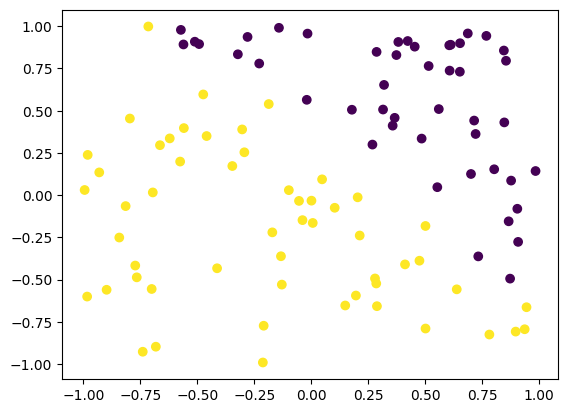

In [24]:
plt.scatter(x=X[:,0],y=X[:,1],c=y)

# Visualizing Network

In [109]:
neural_net.	architecture.GraphManager

neural_net.utils.GraphManager

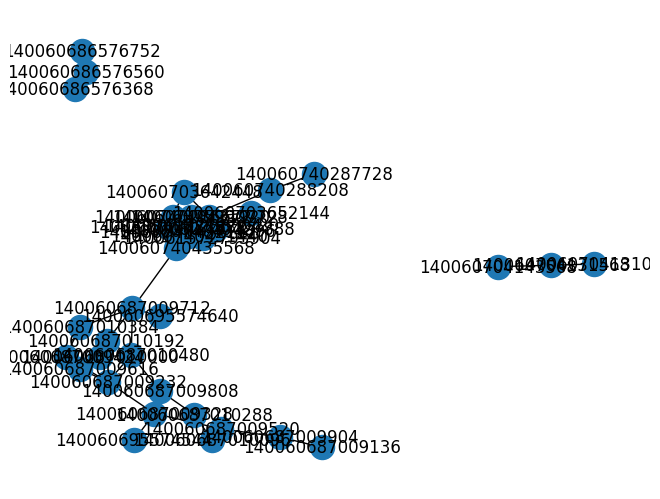

In [110]:
neural_net.	architecture.GraphManager.draw()

In [72]:
neural_net.	architecture.GraphManager.draw(engine='pyviz',params={'notebook':True})

ModelGraph.html


# Cost func

In [73]:
pred = network.predict(X)
pred

[(139672680539088,
  array([[0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
     

In [74]:
Cost = neural_net.loss.binaryCrossEntropy(y,pred)
Cost

In [75]:
Cost.eval()

0.6931471805599453

In [76]:
Cost.prime()

array([[ 0.02],
       [-0.02],
       [ 0.02],
       [ 0.02],
       [ 0.02],
       [-0.02],
       [ 0.02],
       [ 0.02],
       [-0.02],
       [-0.02],
       [-0.02],
       [ 0.02],
       [-0.02],
       [-0.02],
       [ 0.02],
       [ 0.02],
       [-0.02],
       [ 0.02],
       [-0.02],
       [ 0.02],
       [-0.02],
       [-0.02],
       [-0.02],
       [-0.02],
       [-0.02],
       [ 0.02],
       [-0.02],
       [ 0.02],
       [ 0.02],
       [ 0.02],
       [-0.02],
       [ 0.02],
       [ 0.02],
       [-0.02],
       [-0.02],
       [ 0.02],
       [ 0.02],
       [-0.02],
       [ 0.02],
       [-0.02],
       [ 0.02],
       [ 0.02],
       [-0.02],
       [-0.02],
       [ 0.02],
       [ 0.02],
       [-0.02],
       [-0.02],
       [-0.02],
       [ 0.02],
       [-0.02],
       [ 0.02],
       [-0.02],
       [ 0.02],
       [-0.02],
       [-0.02],
       [-0.02],
       [-0.02],
       [-0.02],
       [ 0.02],
       [-0.02],
       [-0.02],
       [

# Backpropagation

## Learning rate

In [111]:
α = .003
α

0.003

In [ ]:
network.steps[-1].outfuncs[0].outid

## Output Layer

In [80]:
network.steps[-1].update({139672680539088:y},α)

{139672680532752: array([[0.  ],
        [0.25],
        [0.  ],
        [0.  ],
        [0.  ],
        [0.25],
        [0.  ],
        [0.  ],
        [0.25],
        [0.25],
        [0.25],
        [0.  ],
        [0.25],
        [0.25],
        [0.  ],
        [0.  ],
        [0.25],
        [0.  ],
        [0.25],
        [0.  ],
        [0.25],
        [0.25],
        [0.25],
        [0.25],
        [0.25],
        [0.  ],
        [0.25],
        [0.  ],
        [0.  ],
        [0.  ],
        [0.25],
        [0.  ],
        [0.  ],
        [0.25],
        [0.25],
        [0.  ],
        [0.  ],
        [0.25],
        [0.  ],
        [0.25],
        [0.  ],
        [0.  ],
        [0.25],
        [0.25],
        [0.  ],
        [0.  ],
        [0.25],
        [0.25],
        [0.25],
        [0.  ],
        [0.25],
        [0.  ],
        [0.25],
        [0.  ],
        [0.25],
        [0.25],
        [0.25],
        [0.25],
        [0.25],
        [0.  ],
        [0.25],
       

In [82]:
Δ = network.steps[-1].update({139672680539088:y},α)

## Last Linear Layer

In [83]:
network.steps[-2]

In [84]:
len(network.steps[-2].In)

10

In [85]:
list(network.steps[-2].In.values())[0].shape

(100, 1)

In [86]:
network.steps[-2].In.values()

dict_values([array([[0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       

In [87]:
len(network.steps[-2].outfuncs)

1

In [88]:
Δ = network.steps[-2].update(Δ,α)
Δ

{139672680543312: array([0.06125]),
 139672680543696: array([0.06125]),
 139672680542736: array([0.06125]),
 139672680540816: array([0.06125]),
 139672680540720: array([0.06125]),
 139672680540336: array([0.06125]),
 139672680540528: array([0.06125]),
 139672680540240: array([0.06125]),
 139672680540144: array([0.06125]),
 139672680532560: array([0.06125])}

In [89]:
%%sql
SELECT * 
FROM
weights


 * sqlite:///neural_net/run/model20240221130605.db
Done.


id,weight_id,neuron_id,created_at,updated_at,value
1,0,139673552776976,2024-02-21 13:06:30,2024-02-21 13:06:30,0.0
2,1,139673552776976,2024-02-21 13:06:30,2024-02-21 13:06:30,0.0
3,2,139673552776976,2024-02-21 13:06:30,2024-02-21 13:06:30,0.0
4,0,139673142045584,2024-02-21 13:06:30,2024-02-21 13:06:30,0.0
5,1,139673142045584,2024-02-21 13:06:30,2024-02-21 13:06:30,0.0
6,2,139673142045584,2024-02-21 13:06:30,2024-02-21 13:06:30,0.0
7,0,139672800498192,2024-02-21 13:06:30,2024-02-21 13:06:30,0.0
8,1,139672800498192,2024-02-21 13:06:30,2024-02-21 13:06:30,0.0
9,2,139672800498192,2024-02-21 13:06:30,2024-02-21 13:06:30,0.0
10,0,139672800498640,2024-02-21 13:06:30,2024-02-21 13:06:30,0.0


## First activation layer

In [90]:
network.steps[-3]

In [91]:
len(network.steps[-3].In)

10

In [92]:
network.steps[-3].out

[(139672680543312,
  array([[0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
     

In [93]:
Δ = network.steps[-3].update(Δ,α)
Δ

{139672547837776: array([[0.0153125],
        [0.0153125],
        [0.0153125],
        [0.0153125],
        [0.0153125],
        [0.0153125],
        [0.0153125],
        [0.0153125],
        [0.0153125],
        [0.0153125],
        [0.0153125],
        [0.0153125],
        [0.0153125],
        [0.0153125],
        [0.0153125],
        [0.0153125],
        [0.0153125],
        [0.0153125],
        [0.0153125],
        [0.0153125],
        [0.0153125],
        [0.0153125],
        [0.0153125],
        [0.0153125],
        [0.0153125],
        [0.0153125],
        [0.0153125],
        [0.0153125],
        [0.0153125],
        [0.0153125],
        [0.0153125],
        [0.0153125],
        [0.0153125],
        [0.0153125],
        [0.0153125],
        [0.0153125],
        [0.0153125],
        [0.0153125],
        [0.0153125],
        [0.0153125],
        [0.0153125],
        [0.0153125],
        [0.0153125],
        [0.0153125],
        [0.0153125],
        [0.0153125],
        [0.015312

## First input layer

In [94]:
Δ = network.steps[-4].update(Δ,α)

## Update method

In [95]:
network.update({139672680539088:y},α)

In [96]:
%%sql
SELECT *
from weights

 * sqlite:///neural_net/run/model20240221130605.db
Done.


id,weight_id,neuron_id,created_at,updated_at,value
1,0,139673552776976,2024-02-21 13:06:30,2024-02-21 13:06:30,0.0
2,1,139673552776976,2024-02-21 13:06:30,2024-02-21 13:06:30,0.0
3,2,139673552776976,2024-02-21 13:06:30,2024-02-21 13:06:30,0.0
4,0,139673142045584,2024-02-21 13:06:30,2024-02-21 13:06:30,0.0
5,1,139673142045584,2024-02-21 13:06:30,2024-02-21 13:06:30,0.0
6,2,139673142045584,2024-02-21 13:06:30,2024-02-21 13:06:30,0.0
7,0,139672800498192,2024-02-21 13:06:30,2024-02-21 13:06:30,0.0
8,1,139672800498192,2024-02-21 13:06:30,2024-02-21 13:06:30,0.0
9,2,139672800498192,2024-02-21 13:06:30,2024-02-21 13:06:30,0.0
10,0,139672800498640,2024-02-21 13:06:30,2024-02-21 13:06:30,0.0


## Logistic Regression

In [129]:
logreg = neural_net.architecture.Sequential(
        [
        neural_net.layers.fullyconnected(n_in=2,n_out=1),
        neural_net.layers.activation(n_in=1,func=neural_net.activation_funcs.σ)
        ],
    cost_func= neural_net.loss.binaryCrossEntropy
    )
_,h = logreg.eval(X)[0]

## Analytic gradient
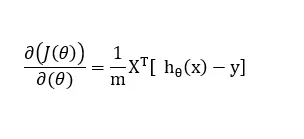

In [130]:
Xconst = numpy.c_[X,numpy.ones((len(X),1))]
J = 1/len(Xconst)*Xconst.T.dot(h-y)
J

array([[ 0.14372856],
       [ 0.1156681 ],
       [-0.14      ]])

## Chain rule

In [131]:
p = logreg.eval(X)

In [132]:
grad0 = logreg.cost_func(y,p).prime()
grad0.shape

(100, 1)

In [133]:
grad1 = logreg.steps[-1].update({logreg.outid:grad0})

In [134]:
grad2 = logreg.steps[-2].update(grad1)

In [135]:
grad2

{140060661036784: array([[ 0.14372856],
        [ 0.1156681 ],
        [-0.14      ]])}

# Training

## Using analytics gradient

In [23]:
sigmoid = lambda w,X : (1/(1+numpy.exp(-X.dot(w)))).reshape(-1,1)

In [137]:
w = numpy.zeros((X.shape[1]+1,1))
w

array([[0.],
       [0.],
       [0.]])

In [138]:
sigmoid(w,Xconst)

array([[0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
      

In [139]:
n_epoch = 100

In [140]:
for _ in range(n_epoch):
    w -= 1/len(Xconst)*Xconst.T.dot(sigmoid(w,Xconst)-y)

In [141]:
pred = (sigmoid(w,Xconst) > .5 )+0

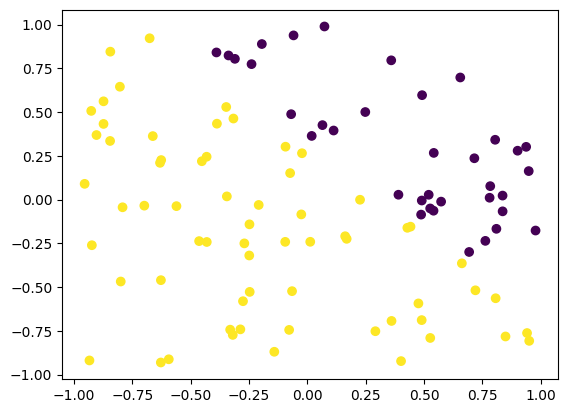

In [142]:
plt.scatter(x=X[:,0],y=X[:,1],c=pred)

## Using chain rule

In [143]:
for _ in range(100):
    p = logreg.eval(X)
    grad0 = logreg.cost_func(y,p).prime()
    grad1 = logreg.steps[-1].update({logreg.outid:grad0})
    grad2 = logreg.steps[-2].update(grad1)


In [144]:
_,p = logreg.eval(X)[0]

In [145]:
p = (p>.5)+0

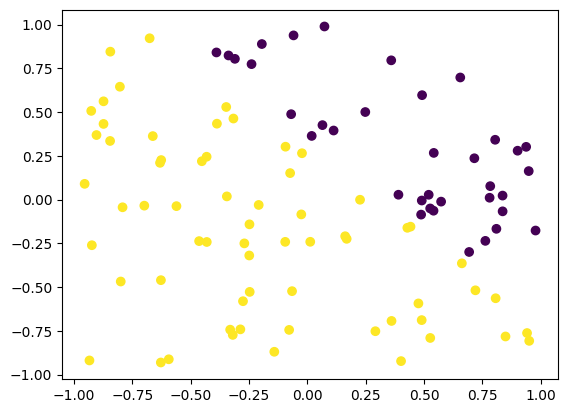

In [146]:
plt.scatter(x=X[:,0],y=X[:,1],c=p)

## Using train method

In [147]:
from importlib import reload

In [148]:
reload(neural_net.architecture)

<module 'neural_net.architecture' from '/home/analyst/notebooks/neural_net/architecture.py'>

In [149]:
logreg = neural_net.architecture.Sequential(
        [
        neural_net.layers.fullyconnected(n_in=2,n_out=1),
        neural_net.layers.activation(n_in=1,func=neural_net.activation_funcs.σ)
        ],
    cost_func= neural_net.loss.binaryCrossEntropy
    )

In [150]:
logreg.train(X,y)

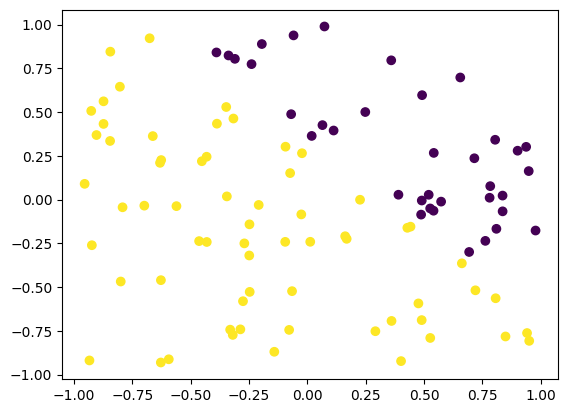

In [151]:
_,p = logreg.eval(X)[0]
p = (p>.5)+0
plt.scatter(x=X[:,0],y=X[:,1],c=p)

# Non linear data

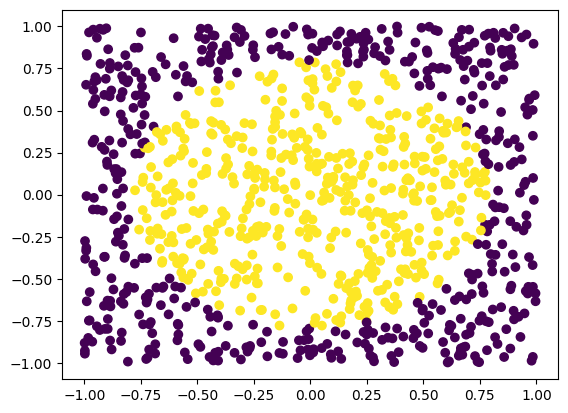

In [24]:
X = numpy.random.uniform(-1, 1, (1000, 2))
y =( (X[:, 0]**2 + X[:, 1]**2)/numpy.pi < 0.2).reshape(-1,1)+0
plt.scatter(x=X[:,0],y=X[:,1],c=y)

## Using analytical logistic regression

In [26]:
Xconst = numpy.c_[X,numpy.ones((len(X),1))]

sigmoid = lambda w,X : (1/(1+numpy.exp(-X.dot(w)))).reshape(-1,1)

w = numpy.zeros((X.shape[1]+1,1))

n_epoch = 1000

for _ in range(n_epoch):
    w -= 1/len(Xconst)*Xconst.T.dot(sigmoid(w,Xconst)-y)

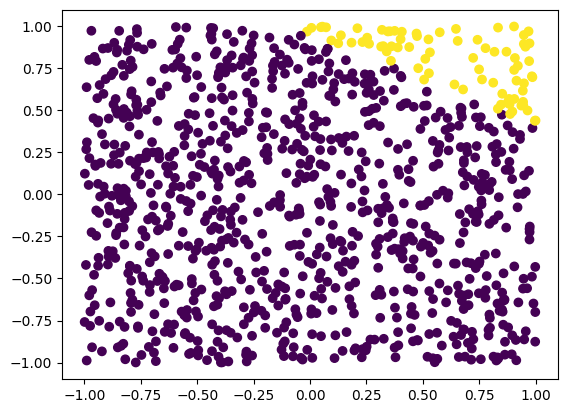

In [27]:
p = sigmoid(w,Xconst)>.5
plt.scatter(x=X[:,0],y=X[:,1],c=p)

## Using Train method

In [28]:
logreg = neural_net.architecture.Sequential(
        [
        neural_net.layers.fullyconnected(n_in=2,n_out=1),
        neural_net.layers.activation(n_in=1,func=neural_net.activation_funcs.σ)
        ],
    cost_func= neural_net.loss.binaryCrossEntropy
    )

In [29]:
logreg.train(X,y,n_epochs=1000)
_,p = logreg.eval(X)[0]


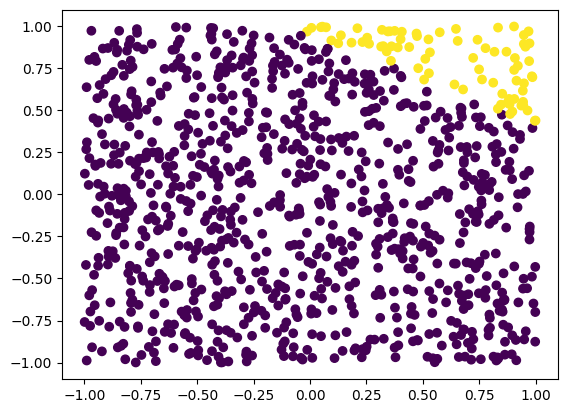

In [30]:
p = p>.5
plt.scatter(x=X[:,0],y=X[:,1],c=p)

# Neural Network

In [30]:
from importlib import reload
reload(neural_net)
reload(neural_net.activation_funcs)

<module 'neural_net.activation_funcs' from '/home/analyst/notebooks/neural_net/activation_funcs.py'>

In [34]:
n_features = 2
n_hidden1 = 50
n_hidden2 = 2
n_output = 1

ann = neural_net.architecture.Sequential(
        [
        neural_net.layers.fullyconnected(n_in=n_features,n_out=n_hidden1),
        neural_net.layers.activation(n_in=n_hidden1,func=neural_net.activation_funcs.LeakyReLU),
            
        neural_net.layers.fullyconnected(n_in=n_hidden1,n_out=n_hidden2),
        neural_net.layers.activation(n_in=n_hidden2,func=neural_net.activation_funcs.LeakyReLU),
            
        neural_net.layers.fullyconnected(n_in=n_hidden2,n_out=n_output),
        neural_net.layers.activation(n_in=n_output,func=neural_net.activation_funcs.σ)
        ],
    cost_func= neural_net.loss.binaryCrossEntropy
    )
ann.eval(X)

[(140321590958320,
  array([[0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
     

In [35]:
import pandas
cursor = neural_net.db.DBmanager.con.cursor()

res = cursor.execute('''

        SELECT * 
        FROM
        layers

''')
pandas.DataFrame(res.fetchall(),columns=map(lambda x : x[0],res.description))

,id,layer_id,n_out,created_at,updated_at,type
0,1,140321590346064,50,2024-02-21 20:52:57,2024-02-21 20:52:57,fullyconnected
1,2,140321590715664,50,2024-02-21 20:52:59,2024-02-21 20:52:59,activation
2,3,140321590589456,2,2024-02-21 20:53:00,2024-02-21 20:53:00,fullyconnected
3,4,140321590590608,2,2024-02-21 20:53:00,2024-02-21 20:53:00,activation
4,5,140321590589968,1,2024-02-21 20:53:00,2024-02-21 20:53:00,fullyconnected
5,6,140321590590800,1,2024-02-21 20:53:00,2024-02-21 20:53:00,activation


In [36]:
res = cursor.execute('''

        SELECT * 
        FROM
        neurons

''')
pandas.DataFrame(res.fetchall(),columns=map(lambda x : x[0],res.description))

,id,neuron_id,n_in,layer_id,created_at,updated_at,type
0,1,140321591280720,2,140321590346064,2024-02-21 20:52:57,2024-02-21 20:52:57,Linear
1,2,140321590716560,2,140321590346064,2024-02-21 20:52:57,2024-02-21 20:52:57,Linear
2,3,140321590717456,2,140321590346064,2024-02-21 20:52:57,2024-02-21 20:52:57,Linear
3,4,140321590715152,2,140321590346064,2024-02-21 20:52:57,2024-02-21 20:52:57,Linear
4,5,140321590714704,2,140321590346064,2024-02-21 20:52:57,2024-02-21 20:52:57,Linear
...,...,...,...,...,...,...,...
101,102,140321590579152,50,140321590589456,2024-02-21 20:53:00,2024-02-21 20:53:00,Linear
102,103,140321590589712,1,140321590590608,2024-02-21 20:53:00,2024-02-21 20:53:00,LeakyReLU
103,104,140321590590224,1,140321590590608,2024-02-21 20:53:00,2024-02-21 20:53:00,LeakyReLU
104,105,140321590590416,2,140321590589968,2024-02-21 20:53:00,2024-02-21 20:53:00,Linear


# Training 

In [ ]:
ann.train(X,y,α=0.003,metrics=neural_net.metrics.accuracy,batch_size=10)

epoch 0 accuracy 0.6
epoch 1 accuracy 0.6


In [89]:
_,p = ann.eval(X)[0]

In [94]:
class r:
    def __init__(self):
        ...
    def __str__(self):
        return 'iiiiiiii'

In [96]:
a = r()

In [97]:
str(a)

'iiiiiiii'